Scratch:

Read in Communities data (summary spreadsheet from GRID3 SEs w/UN PP data):
EG: AFPW-GHA-Communities-Ahafo.1000-20000.summary.xlsx

Read in WQAL lab locations data (filter down to only regional labs)

F.E. community, get distance to all lab locations
Find min distance to any lab; save distance (KM) and nearest lab 

Add to community summary data sheet and re-export

Get filter numbers: num within 60k, 120k, 180k, 240k, >


**NB**: Eventually, add this to the AFPW Ghana Communities data processing sheet - to create all that data in one place

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from tqdm.notebook import tqdm
from geopy.distance import distance

In [6]:
comms_file = "./export/AFPW-Communities.1000-50000.summary.annotated.xlsx"
pp_file = "./export/AFPW-PopulatedPlaces.1000-50000.xlsx"
labs_file = "./data/GWCL Regional Labs.xlsx"

In [37]:
reg_order = ["Ahafo", "Bono", "Ashanti", "Eastern", "Volta", "Central", "Western", "Western North", "Bono East"]

## Load Labs

In [3]:
labs_df = pd.read_excel(labs_file)
labs_df = labs_df.dropna(subset=["Latitude", "Longitude"])
labs_df.shape

(9, 9)

In [4]:
labs_df

,Name,Type,Region,District,Community,Latitude,Longitude,StreetAddress,Comments
1,Ashanti Regional Laboratory,regional,Ashanti,Kumasi Metropolitan Assembly,Kumasi,6.583405,-1.619360,"Dadiesoaba street, Kumasi, Ghana",BY 2024
2,Western Regional Laboratory,regional,Western,Sekondi - Takoradi Metropolitan Assembly,Takoradi,4.906113,-1.767554,NaN,Location assigned from approximate center of T...
3,Central Regional Laboratory,regional,Central,Cape Coast Metropolitan,Cape Coast,5.124964,-1.269743,NaN,Location assigned from approximate center of C...
4,Eastern Regional Laboratories,regional,Eastern,New Juaben Municipal,Koforidua,6.108099,-0.283530,Nankese- Koforidua Rd,BY 2024-06
5,Northern Regional Laboratory,regional,Northern,Tamale Metropolitan,Tamale,9.417267,-0.849710,"C48X+RWC, Education Ridge Rd, Tamale, Ghana",Location and address via Google Maps search (m...
6,Volta Regional Laboratory,regional,Volta,Ho Municipal,Ho,6.610102,-0.460243,Woezor Hotel road,BY 2024-06
7,Brong Ahafo Regional Laboratory,regional,Bono,Sunyani Municipal,Sunyani,7.332161,-2.330540,"Anglican, Sunyani , Ghana",BY 2024-06
8,Upper East Regional Laboratory,regional,Upper East,Bolgatanga Municipal,Bolgatanga,10.793384,-0.856519,NaN,Location assigned from approximate center of B...
9,Upper West Regional Laboratory,regional,Upper West,Wa Municipal,Wa,10.059880,-2.511347,NaN,Location assigned from approximate center of W...


## Load Communities and Populated Places

In [11]:
comms_df = pd.read_excel(comms_file)
comms_df = comms_df.set_index("mgrs_code")
comms_df.shape

(1641, 23)

In [12]:
comms_df.head(1)

,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,adm2_pcode,...,approx_center_lat,approx_center_lon,NumCommunities,CommunityName,HAS_SYSTEM,SYSTEM_SOURCE,SYSTEM_SPEC,HAS_SYSTEM_INTERNAL,HAS_SYSTEM_PUBLIC,ESTIMATED_SYSTEM
mgrs_code,,,,,,,,,,,,,,,,,,,,,
30NWL1358_01,Ghana,GHA,Built-up Area,25352.007683,23842.976286,GH,Western,GH15,Jomoro,GH1504,...,5.052099,-2.879743,1,Half Assini,False,NaN,NaN,False,False,True


## Load Populated Places

In [13]:
pp_df = pd.read_excel(pp_file)
pp_df.shape

(2002, 16)

In [14]:
pp_df.head(1)

,country,adm1_name,adm1_pcode,adm2_name,adm2_pcode,community,latitude,longitude,settlement_type,pop_un_adj,mgrs_code,settl_pcode,assignment_method,source,source_id,source_id_field
0,Ghana,Western,GH15,Jomoro,GH1504,Half Assini,5.051354,-2.885167,Built-up Area,23842.976286,30NWL1358_01,GH1504000001,contains,HOT-OSM,1964993116,osm_id


### Attach Annotations to PPs

In [23]:
for p in pp_df.itertuples():
    c = comms_df.loc[p.mgrs_code]
    pp_df.at[p.Index, "HAS_SYSTEM"] = c.HAS_SYSTEM
    pp_df.at[p.Index, "ESTIMATED_SYSTEM"] = c.ESTIMATED_SYSTEM

In [24]:
pp_df.head(3)

,country,adm1_name,adm1_pcode,adm2_name,adm2_pcode,community,latitude,longitude,settlement_type,pop_un_adj,mgrs_code,settl_pcode,assignment_method,source,source_id,source_id_field,HAS_SYSTEM,ESTIMATED_SYSTEM
0,Ghana,Western,GH15,Jomoro,GH1504,Half Assini,5.051354,-2.885167,Built-up Area,23842.976286,30NWL1358_01,GH1504000001,contains,HOT-OSM,1964993116,osm_id,False,True
1,Ghana,Western,GH15,Jomoro,GH1504,Elubo,5.283333,-2.766667,Built-up Area,11439.512173,30NWL2584_01,GH1504000002,nearest,COD-PP,GH15040002,Pcod,False,True
2,Ghana,Western,GH15,Jomoro,GH1504,Tikobo No. 1,5.057596,-2.690559,Built-up Area,12355.734547,30NWL3458_02,GH1504000003,contains,HOT-OSM,1830247436,osm_id,False,True


## Compute Nearest Labs - Populated Places (Actual Communities)

In [25]:
for c in tqdm(pp_df.itertuples()):
    min_dist_lab = None
    min_dist = 9999.0
    for l in labs_df.itertuples():
        d = distance((c.latitude, c.longitude), (l.Latitude, l.Longitude))
        #print(f"{c.UN_CommunityName} {c.approx_center_lat}, {c.approx_center_lon}\t{l.Name}\t{d}")
        if d < min_dist:
            min_dist = d
            min_dist_lab = l
    if min_dist_lab is None:
        print(f"No min dist for <{c}>!")
    else:
        pp_df.at[c.Index, "NearestRegionalLab"] = min_dist_lab.Name
        pp_df.at[c.Index, "NearestRegionalLab_DistanceKM"] = min_dist.km

0it [00:00, ?it/s]

In [26]:
pp_df.head(2)

,country,adm1_name,adm1_pcode,adm2_name,adm2_pcode,community,latitude,longitude,settlement_type,pop_un_adj,mgrs_code,settl_pcode,assignment_method,source,source_id,source_id_field,HAS_SYSTEM,ESTIMATED_SYSTEM,NearestRegionalLab,NearestRegionalLab_DistanceKM
0,Ghana,Western,GH15,Jomoro,GH1504,Half Assini,5.051354,-2.885167,Built-up Area,23842.976286,30NWL1358_01,GH1504000001,contains,HOT-OSM,1964993116,osm_id,False,True,Western Regional Laboratory,124.98206
1,Ghana,Western,GH15,Jomoro,GH1504,Elubo,5.283333,-2.766667,Built-up Area,11439.512173,30NWL2584_01,GH1504000002,nearest,COD-PP,GH15040002,Pcod,False,True,Western Regional Laboratory,118.37726


## Explore

In [29]:
pp_df["NearestRegionalLab"].value_counts()

NearestRegionalLab
Ashanti Regional Laboratory        524
Eastern Regional Laboratories      415
Volta Regional Laboratory          323
Brong Ahafo Regional Laboratory    298
Central Regional Laboratory        269
Western Regional Laboratory        164
Northern Regional Laboratory         9
Name: count, dtype: int64

<Axes: xlabel='NearestRegionalLab_DistanceKM', ylabel='Percent'>

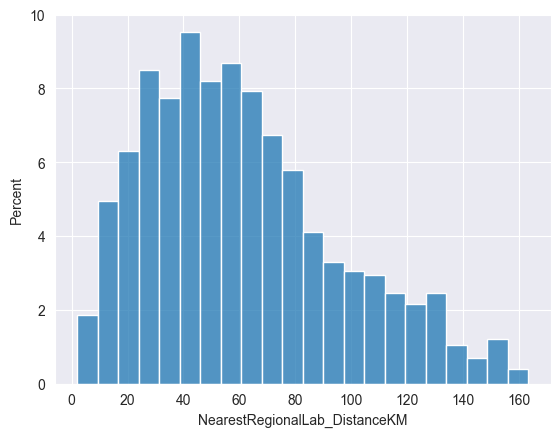

In [28]:
sns.set_style("darkgrid")
sns.histplot(data=pp_df, x="NearestRegionalLab_DistanceKM", stat="percent")

## Distance Stats

In [46]:
limits = [30, 60, 120, 180]

In [53]:
results_data = {}

for reg, reg_df in pp_df.groupby("adm1_name"):
    total = reg_df.shape[0]
    results_data[reg] = {"Total": total}
    
    for dl in limits:
        num_within = (reg_df["NearestRegionalLab_DistanceKM"] < dl).sum()
        results_data[reg][f"Within {dl} KM"] = int(num_within)
        results_data[reg][f"Within {dl} KM (%)"] = f"{100 * num_within / total:0.0f}%"

results_df = pd.DataFrame(results_data)[reg_order].copy()

In [54]:
results_df

,Ahafo,Bono,Ashanti,Eastern,Volta,Central,Western,Western North,Bono East
Total,45,141,426,456,269,306,176,84,99
Within 30 KM,11,14,116,141,0,75,47,0,0
Within 30 KM (%),24%,10%,27%,31%,0%,25%,27%,0%,0%
Within 60 KM,29,76,372,342,2,185,77,0,13
Within 60 KM (%),64%,54%,87%,75%,1%,60%,44%,0%,13%
Within 120 KM,45,141,426,456,183,306,161,65,65
Within 120 KM (%),100%,100%,100%,100%,68%,100%,91%,77%,66%
Within 180 KM,45,141,426,456,269,306,176,84,99
Within 180 KM (%),100%,100%,100%,100%,100%,100%,100%,100%,100%


In [63]:
results_df.to_excel("./export/CommunityPWS-RoadDists-All PPs.xlsx")

In [56]:
pp_est_df = pp_df[pp_df["ESTIMATED_SYSTEM"]].copy()

ests_data = {}

for reg, reg_df in pp_est_df.groupby("adm1_name"):
    total = reg_df.shape[0]
    ests_data[reg] = {"Total": total}
    
    for dl in limits:
        num_within = (reg_df["NearestRegionalLab_DistanceKM"] < dl).sum()
        ests_data[reg][f"Within {dl} KM"] = int(num_within)
        ests_data[reg][f"Within {dl} KM (%)"] = f"{100 * num_within / total:0.0f}%"


ests_df = pd.DataFrame(ests_data)[reg_order].copy()

In [61]:
ests_df

,Ahafo,Bono,Ashanti,Eastern,Volta,Central,Western,Western North,Bono East
Total,40,90,245,305,167,189,99,37,45
Within 30 KM,11,9,64,89,0,55,30,0,0
Within 30 KM (%),28%,10%,26%,29%,0%,29%,30%,0%,0%
Within 60 KM,28,52,218,229,2,121,44,0,8
Within 60 KM (%),70%,58%,89%,75%,1%,64%,44%,0%,18%
Within 120 KM,40,90,245,305,112,189,91,29,28
Within 120 KM (%),100%,100%,100%,100%,67%,100%,92%,78%,62%
Within 180 KM,40,90,245,305,167,189,99,37,45
Within 180 KM (%),100%,100%,100%,100%,100%,100%,100%,100%,100%


In [64]:
ests_df.to_excel("./export/CommunityPWS-RoadDists-PWS PPs.xlsx")

## Test Mapbox distances (driving / road travel)

EG:
```python
resp = Directions('mapbox.driving').directions([origin, destination])
driving_routes = resp.geojson()
first_route = driving_routes['features'][0]
```

In [52]:
import json
import mapbox

In [35]:
# The (lon, lat) GEOJSON point features
gambia2_ft = (-2.656115, 7.0623)
ba_lab_ft = (-2.33054, 7.332161)

In [43]:
directions_con = mapbox.Directions(access_token="pk.eyJ1IjoiZHVuY2FuLWFxdWF5YSIsImEiOiJjbHhiem5oMHMwaDZ2MmtzMzE3MDRtbG10In0.Z3c0_caJZMXjbR0bYw-w2w")
directions_con

In [46]:
resp = directions_con.directions(features=[gambia2_ft, ba_lab_ft], profile="mapbox.driving")
resp

/Users/datascience/Development/aquaya/py-sandbox/venv/lib/python3.9/site-packages/mapbox/services/directions.py:41: MapboxDeprecationWarning: Converting v4 profile to v5, use mapbox/driving instead
  warnings.warn('Converting v4 profile to v5, use {} instead'.format(profile),


<Response [200]>

In [48]:
resp_data = resp.geojson()

In [62]:
# Distance: meters; Duration: seconds
resp_data["features"][0]["properties"]

{'distance': 97302.219, 'duration': 9363.027}

In [54]:
json.dumps(resp_data)

'{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "LineString", "coordinates": [[-2.65611, 7.06206], [-2.65594, 7.06207], [-2.6554, 7.06249], [-2.65521, 7.06305], [-2.68197, 7.08522], [-2.69859, 7.09372], [-2.71456, 7.09678], [-2.74574, 7.14701], [-2.75765, 7.16015], [-2.76926, 7.16598], [-2.77134, 7.17588], [-2.78348, 7.20096], [-2.78614, 7.22631], [-2.78168, 7.2365], [-2.77402, 7.23969], [-2.77008, 7.24645], [-2.76354, 7.25134], [-2.75879, 7.25825], [-2.75847, 7.26307], [-2.74032, 7.26149], [-2.73085, 7.26518], [-2.71755, 7.2648], [-2.70839, 7.28729], [-2.70065, 7.29468], [-2.69908, 7.30788], [-2.70606, 7.32125], [-2.70558, 7.32547], [-2.67011, 7.35486], [-2.66108, 7.3692], [-2.65802, 7.37869], [-2.65832, 7.39083], [-2.6548, 7.3971], [-2.63069, 7.42317], [-2.60922, 7.43827], [-2.59556, 7.44185], [-2.58409, 7.45042], [-2.57212, 7.43806], [-2.56385, 7.4337], [-2.54821, 7.43808], [-2.51377, 7.43648], [-2.47546, 7.41006], [-2.4691, 7.40337], [-2.44415, 

In [55]:
resp_data


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [(-2.65611, 7.06206),
     (-2.65594, 7.06207),
     (-2.6554, 7.06249),
     (-2.65521, 7.06305),
     (-2.68197, 7.08522),
     (-2.69859, 7.09372),
     (-2.71456, 7.09678),
     (-2.74574, 7.14701),
     (-2.75765, 7.16015),
     (-2.76926, 7.16598),
     (-2.77134, 7.17588),
     (-2.78348, 7.20096),
     (-2.78614, 7.22631),
     (-2.78168, 7.2365),
     (-2.77402, 7.23969),
     (-2.77008, 7.24645),
     (-2.76354, 7.25134),
     (-2.75879, 7.25825),
     (-2.75847, 7.26307),
     (-2.74032, 7.26149),
     (-2.73085, 7.26518),
     (-2.71755, 7.2648),
     (-2.70839, 7.28729),
     (-2.70065, 7.29468),
     (-2.69908, 7.30788),
     (-2.70606, 7.32125),
     (-2.70558, 7.32547),
     (-2.67011, 7.35486),
     (-2.66108, 7.3692),
     (-2.65802, 7.37869),
     (-2.65832, 7.39083),
     (-2.6548, 7.3971),
     (-2.63069, 7.42317),
     (-2.60922, 7.43827),
     